In [4]:
import numpy as np
from numpy import fft as fft
from matplotlib import pyplot as plt
import astropy.io.fits as pyfits

In [8]:
x = 1000
kfreq = fft.fftfreq(x)*x
kfreq = fft.fftshift(kfreq)
kfreq2D = np.meshgrid(kfreq, kfreq)

# take the norm of the wave vectors
kfreq_norm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

In [25]:
def get_kbins_slicer(data):
    x = np.arange(10)*100
    while x[-1] < data.size-1000:
        x = np.append(x, x[-1]+1000)
    print(x)
    rbins = np.interp(x,
                      np.arange(data.size),
                      np.sort(data))

    return rbins


In [28]:
kbins = get_kbins_slicer(kfreq_norm.flatten())
print(kbins)

[     0    100    200 ... 997900 998900 999900]
[  0.           5.65685425   8.06225775 ... 684.48520802 690.8436871
 702.16023812]


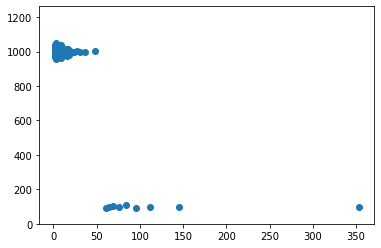

nr [  97  100   96 ... 1004  996 1008]
353.55 : 97
145.78 : 100
111.66 : 96
95.11 : 92
83.93 : 112
75.35 : 96
69.22 : 104
64.45 : 100
60.55 : 92
48.08 : 1004
36.36 : 1000
30.47 : 1000
26.78 : 1004
24.17 : 996
22.18 : 1000
20.61 : 1000
19.35 : 1004
18.30 : 980
17.39 : 1016
16.60 : 1004
15.92 : 996
15.32 : 976
14.77 : 1012
14.29 : 1012
13.84 : 1004
13.44 : 1000
13.07 : 996
12.73 : 1000
12.41 : 996
12.12 : 992
11.84 : 1012
11.59 : 996
11.35 : 1004
11.12 : 996
10.91 : 1004
10.71 : 996
10.52 : 1000
10.34 : 996
10.17 : 1008
10.01 : 992
9.85 : 1012
9.70 : 1000
9.55 : 996
9.42 : 1000
9.29 : 1004
9.17 : 992
9.05 : 1004
8.93 : 1000
8.82 : 1004
8.71 : 960
8.61 : 1040
8.51 : 996
8.41 : 992
8.32 : 1008
8.23 : 1004
8.14 : 1000
8.06 : 992
7.97 : 1004
7.90 : 1000
7.82 : 1004
7.74 : 1000
7.67 : 996
7.60 : 992
7.53 : 1008
7.46 : 1000
7.40 : 1000
7.33 : 1004
7.27 : 996
7.21 : 1000
7.15 : 984
7.10 : 1016
7.04 : 1004
6.98 : 992
6.93 : 1008
6.88 : 1000
6.83 : 1000
6.78 : 984
6.73 : 992
6.68 : 1024
6.63 : 99

In [30]:
nr = np.histogram(kfreq_norm.flatten(),kbins)[0]
rbin_center = 0.5*(kbins[1:]+kbins[:-1])
theta_center = 1.0/rbin_center*1000
plt.plot(theta_center, nr, 'o')
plt.ylim(0, np.max(nr)*1.2)
plt.show()

print("nr", nr)

for t, n in zip(theta_center, nr):
    print(f"{t:0.2f} : {n}")